<h1><center>Лабараторна робота №1</center></h1>
<h3><center>Бездушного Вадима(К-24)</center></h3>

In [1]:
import json
import matplotlib
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

$f(x) = x^3 - 4x^2 - 7x +13$

$f'(x) = 3x^2 - 8x - 7$

$\varphi(x) = x - \lambda f(x)$

In [2]:
EPS = 1e-4
def f(x):
    return x**3 - 4*x**2 - 7*x + 13
def df(x):
    return 3*x**2 - 8*x - 7
def phi(x, _lambda):
    return x - _lambda * f(x)

Розглянемо графік функції $f(x)$

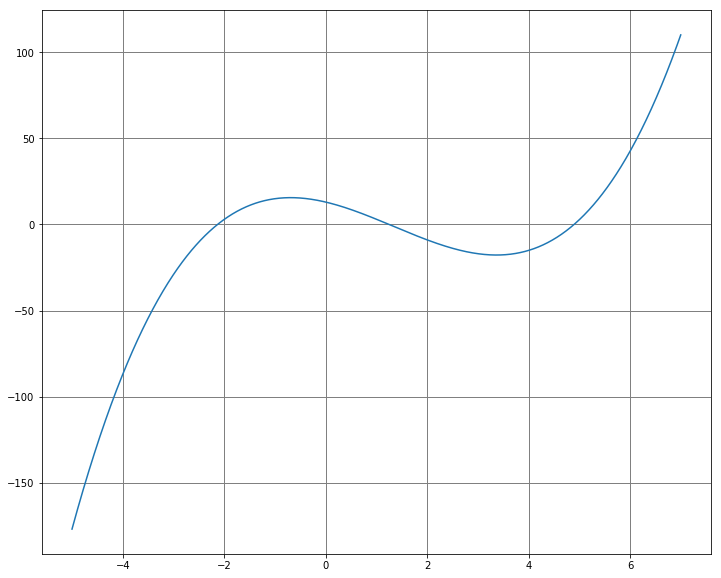

In [3]:
y = np.arange(-5,7,0.01)
plt.figure(figsize=(12,10))
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.plot(y, f(y))

## Метод простої ітерації

Потім ми будемо використовувати цю ж функцію для методу релаксації

In [4]:
def simple_iteration(x_start, color, _lambda):
    x = x_start
    plt.plot(x, f(x), color+'x')
    iteration_count = 0
    print("Start point is {}".format(x_start))
    while True:
        new_x = phi(x, _lambda)
        print("From {: 3.6f} to {: 3.6f} delta ={: 3.6f}  f(x)={: 10.8f}".format(x, new_x, x-new_x, f(x)))
        plt.plot(x,f(x), color+'.')
        iteration_count += 1
        if abs(new_x - x) < EPS:
            break
        x = new_x
    print("Ended with {:2d} iterations".format(iteration_count))
    print("Final value = {: 3.6f}".format(x))
    print()

Start point is 6
From  6.000000 to  5.570000 delta = 0.430000  f(x)= 43.00000000
From  5.570000 to  5.342809 delta = 0.227191  f(x)= 22.71909300
From  5.342809 to  5.203493 delta = 0.139316  f(x)= 13.93163886
From  5.203493 to  5.111875 delta = 0.091617  f(x)= 9.16172355
From  5.111875 to  5.049160 delta = 0.062716  f(x)= 6.27159000
From  5.049160 to  5.005128 delta = 0.044032  f(x)= 4.40316936
From  5.005128 to  4.973689 delta = 0.031439  f(x)= 3.14386924
From  4.973689 to  4.950980 delta = 0.022709  f(x)= 2.27089313
From  4.950980 to  4.934443 delta = 0.016538  f(x)= 1.65376093
From  4.934443 to  4.922329 delta = 0.012114  f(x)= 1.21138706
From  4.922329 to  4.913418 delta = 0.008911  f(x)= 0.89109744
From  4.913418 to  4.906843 delta = 0.006575  f(x)= 0.65750992
From  4.906843 to  4.901980 delta = 0.004862  f(x)= 0.48624762
From  4.901980 to  4.898378 delta = 0.003602  f(x)= 0.36019050
From  4.898378 to  4.895707 delta = 0.002671  f(x)= 0.26713947
From  4.895707 to  4.893724 delta =

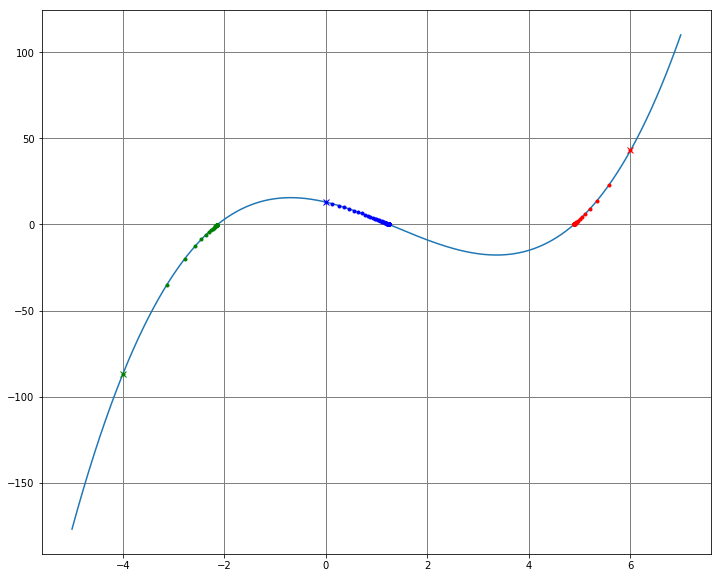

In [5]:
# Побудова графіка функції
y = np.arange(-5,7,0.01)
plt.figure(figsize=(12,10))
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.plot(y, f(y))

# Методи простої ітерації для трьох точок
simple_iteration(6, 'r', 0.01)
simple_iteration(0, 'b', -0.01)
simple_iteration(-4, 'g', 0.01)

## Метод релаксації
В методі релаксації будемо вибирати коефіцієнт в формулі $\varphi(x)$ оптимальним чином
$\lambda = \frac{2}{Max - Min}$  
$Max = max\{f(x), x \in [l, r]\}$  
$Min = min\{f(x), x \in [l, r]\}$


Start point is 6
From  6.000000 to  5.087052 delta = 0.912948  f(x)= 43.00000000
From  5.087052 to  4.969824 delta = 0.117228  f(x)= 5.52146645
From  4.969824 to  4.923857 delta = 0.045967  f(x)= 2.16504806
From  4.923857 to  4.904083 delta = 0.019773  f(x)= 0.93131991
From  4.904083 to  4.895280 delta = 0.008804  f(x)= 0.41465371
From  4.895280 to  4.891303 delta = 0.003977  f(x)= 0.18731498
From  4.891303 to  4.889495 delta = 0.001808  f(x)= 0.08516074
From  4.889495 to  4.888670 delta = 0.000824  f(x)= 0.03882909
From  4.888670 to  4.888294 delta = 0.000376  f(x)= 0.01772730
From  4.888294 to  4.888122 delta = 0.000172  f(x)= 0.00809816
From  4.888122 to  4.888043 delta = 0.000079  f(x)= 0.00370040
Ended with 11 iterations
Final value =  4.888122

Start point is 0
From  0.000000 to  0.276008 delta =-0.276008  f(x)= 13.00000000
From  0.276008 to  0.504972 delta =-0.228964  f(x)= 10.78425221
From  0.504972 to  0.687009 delta =-0.182037  f(x)= 8.57397635
From  0.687009 to  0.827715 del

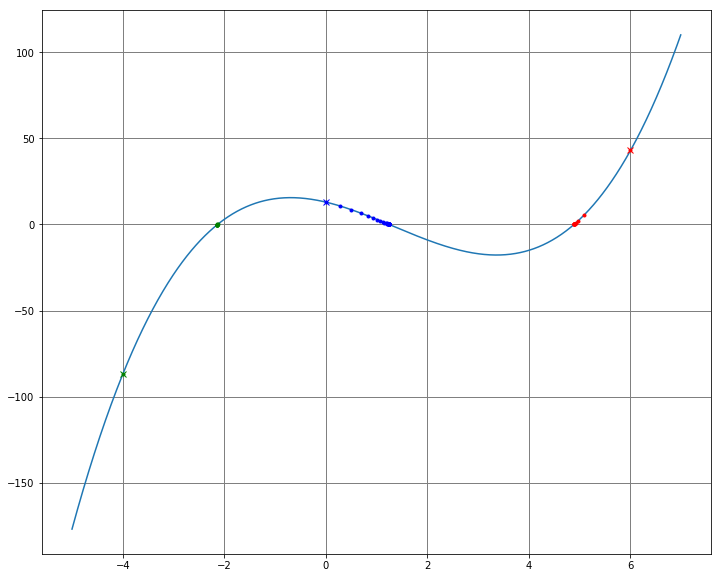

In [6]:
# Побудуємо графік функції
y = np.arange(-5,7,0.01)
plt.figure(figsize=(12,10))
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.plot(y, f(y))


def get_best_lambda_for_range(rstart, rend):
    return 2/( max(abs(df(np.arange(-4,-2,0.01)))) + min(abs(df(np.arange(-4,-2,0.01)))))

simple_iteration(6,  'r',  get_best_lambda_for_range(4, 6))
simple_iteration(0,  'b', -get_best_lambda_for_range(0, 2))
simple_iteration(-4, 'g',  get_best_lambda_for_range(-4, -1))

## Висновок
Як можна побачити, метод релаксації дозволяє підібрати оптимальну константу для функції $\varphi(x) = x + \lambda f(x)$ і виконав менше ітерацій ніж метод простої ітерації.